`Author : Pramil Paudel 
 In Partial fullfillment of "Introduction to data science`

Import required packages

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn import preprocessing  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
# from mlxtend.plotting import plot_decision_regions

print("Packages loaded successfully")
      

Packages loaded successfully


###### Read data and looking at the data structure 
###### Group By 'Play' and "Player" so we can find how many different players are there for a play as well as their repetition. 
###### Is a count displayed is true ? There may be the cases of NaN too. Our idea is to find Player, if it is NaN, does it signify the data ? So removing the lines where any of the columns is NaN. 

#### Data Reading ::::

In [34]:
## defining source and printing 10 lines using pandas dataframe 
## describing the data frame 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_two'
shakespeare_drama_df = pd.read_csv(PROJECT_ROOT_DORECTORY + "/data/Shakespeare_data.csv")

#### Removing NaN ::::

In [37]:
## Removing the rows where any column is NaN
shakespeare_drama_df = shakespeare_drama_df.dropna( axis=0)

#### Looking more of data ::::

Player distribution is :>>>>>>
count         105152
unique           934
top       GLOUCESTER
freq            1811
Name: Player, dtype: object
Player distribution against Play is :>>>>>>
    Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
3          4  Henry IV               1.0        1.1.1  KING HENRY IV   
4          5  Henry IV               1.0        1.1.2  KING HENRY IV   
5          6  Henry IV               1.0        1.1.3  KING HENRY IV   
6          7  Henry IV               1.0        1.1.4  KING HENRY IV   
7          8  Henry IV               1.0        1.1.5  KING HENRY IV   
8          9  Henry IV               1.0        1.1.6  KING HENRY IV   
9         10  Henry IV               1.0        1.1.7  KING HENRY IV   
10        11  Henry IV               1.0        1.1.8  KING HENRY IV   
11        12  Henry IV               1.0        1.1.9  KING HENRY IV   
12        13  Henry IV               1.0       1.1.10  KING HENRY IV   

                    

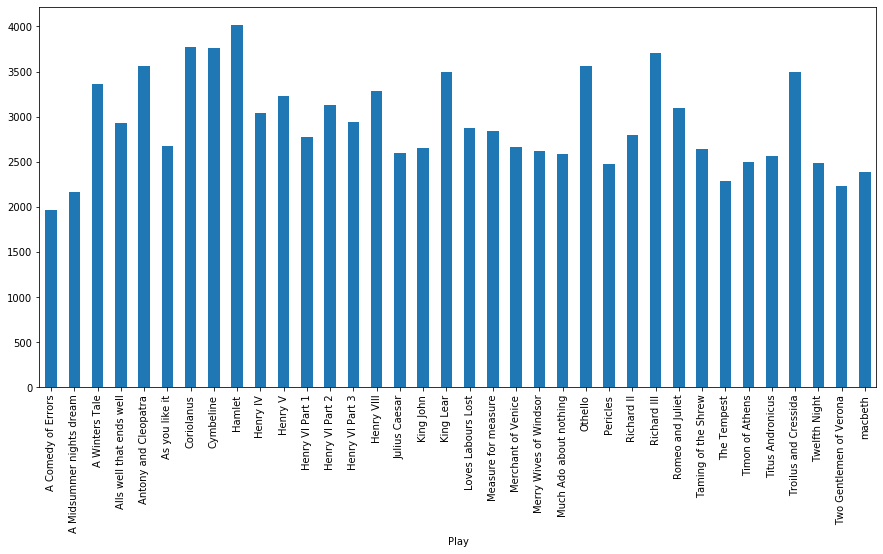

In [38]:
##Finding the information of Player occurance  
print("Player distribution is :>>>>>>")
print(shakespeare_drama_df['Player'].describe())

## Getting more details of the data, grouping by play and plot against Player 

print("Player distribution against Play is :>>>>>>")
shakespeare_drama_grouped_play = shakespeare_drama_df.groupby("Play").count()

fig, ax = plt.subplots(figsize=(15,7))
shakespeare_drama_grouped_play['Player'].plot.bar()

print(shakespeare_drama_df.head(10))

#### Dropping unwanted column : Dataline ::::

In [43]:
shakespeare_drama_df = shakespeare_drama_df[['Play','PlayerLinenumber', 'ActSceneLine','PlayerLine','Player']]
print(shakespeare_drama_df.head(10))

        Play  PlayerLinenumber ActSceneLine  \
3   Henry IV               1.0        1.1.1   
4   Henry IV               1.0        1.1.2   
5   Henry IV               1.0        1.1.3   
6   Henry IV               1.0        1.1.4   
7   Henry IV               1.0        1.1.5   
8   Henry IV               1.0        1.1.6   
9   Henry IV               1.0        1.1.7   
10  Henry IV               1.0        1.1.8   
11  Henry IV               1.0        1.1.9   
12  Henry IV               1.0       1.1.10   

                                           PlayerLine         Player  
3              So shaken as we are, so wan with care,  KING HENRY IV  
4          Find we a time for frighted peace to pant,  KING HENRY IV  
5      And breathe short-winded accents of new broils  KING HENRY IV  
6             To be commenced in strands afar remote.  KING HENRY IV  
7           No more the thirsty entrance of this soil  KING HENRY IV  
8   Shall daub her lips with her own children's bl...  K

#### Defining a subroute for plotting a heatmap ::::

In [44]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 18, 18
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

#### Updating String data to Numerical data using labelEncoding ::::

   Play  PlayerLinenumber  ActSceneLine  PlayerLine  Player
3     9                 0           324       60240     457
4     9                 0           435       23568     457
5     9                 0           546        4998     457
6     9                 0           657       73793     457
7     9                 0           768       48893     457


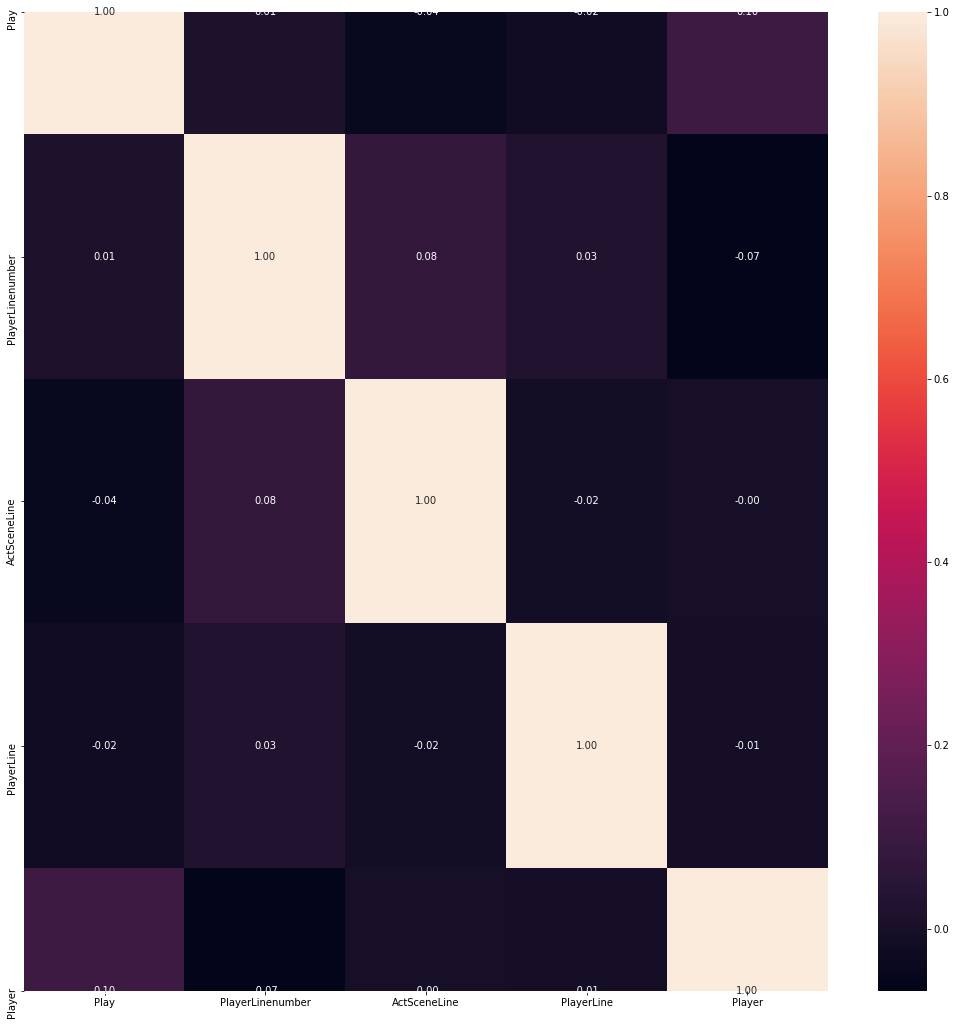

In [45]:
le = preprocessing.LabelEncoder()
shakespeare_drama_df = shakespeare_drama_df.apply(le.fit_transform)
print(shakespeare_drama_df.head())
plot_correlation(shakespeare_drama_df)

In [48]:
# # Lets plot a heatmap 
# import nltk
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# tfidfconverter = TfidfTransformer()
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# shakespeare_drama_df = tfidfconverter.fit_transform(shakespeare_drama_df).toarray()

#### Now lets make train and test dataset,Lets divide around 70% as train set and test it against the test dataset ::::

In [46]:

#Separating target column at first 
feature_columns =['Play','PlayerLinenumber', 'ActSceneLine','PlayerLine']
target_column=['Player']

# Retaining required columns in each DF 
x_drama_df = shakespeare_drama_df[feature_columns]
y_drama_df = shakespeare_drama_df[target_column]

## Separating data in test and train set using sklearn train_test_separation method 
x_train,x_test,y_train,y_test=train_test_split(x_drama_df,y_drama_df,train_size=0.7,test_size=0.3,random_state=123)

# x_train.head(10)

#### Classifier -01 
##### Lets apply k-nearest neighbour Classifier 
##### To apply K -nearest neighbour Classifier,  KNeighborsClassifier package from sklearn is used 
##### We define classifier using the train set and later use it to fit test data 
##### We have to pass the neighbors count too (Lets check with random number and find out best ) 

In [47]:
k_classifier = KNeighborsClassifier(n_neighbors=4)
print(y_train.head())
# Fitting the data
k_classifier.fit(x_train,y_train)
G = k_classifier.kneighbors_graph(x_train)
G.toarray()

# Predicting and calculating the score 
k_classifier.predict(x_test)

#Calculating the score of prediction 
k_classifier.score(x_test,y_test,sample_weight=None)

       Player
31391      82
71569     156
15331     482
96516      76
51329     363


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.05461865212705256

#### Classifier-02
##### Lets try Naive Bayes Classifier using sklearn

In [8]:
## Classifier creation
gnb_classifier = GaussianNB()
#Fitting train data
gnb_classifier.fit(x_train,y_train)
# Predicting the test data 
y_pred = gnb_classifier.predict(x_test)
gnb_classifier.score(x_test,y_test,sample_weight=None)


/Users/patthar/.conda/envs/corona_virus/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.23156660115387054

#### Classifier -03 
##### Lets use another Classifier Decision Tree Classifier 
##### USED gini value as decision

In [25]:
gini_classifier_insurance = DecisionTreeClassifier(max_depth=3)
gini_classifier_insurance = gini_classifier_insurance.fit(x_train, y_train)
# predict the response for the test data set
y_pred = gini_classifier_insurance.predict(x_test)
# Evaluating model
# Checking agnaist real data
result = "Accuracy Gini Classifier Insurance Fraud Using {} % training and depth {}: : : : ".format(100 - 100*.30, 3)
print(result, metrics.accuracy_score(y_test, y_pred))


Accuracy Gini Classifier Insurance Fraud Using 70.0 % training and depth 3: : : :  0.06067330247891967


## I tried using Decision tree classifier but it gave just around 6% of accuracy. So GNB and KN classification worked better then DT classifier